# Linear SVM Classification

## Soft Margin Classification

In [1]:
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2) # Iris virginica

svm_clf = make_pipeline(
    StandardScaler(),
    LinearSVC(C=1, random_state=42),
)

svm_clf.fit(X, y)

/home/julio/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

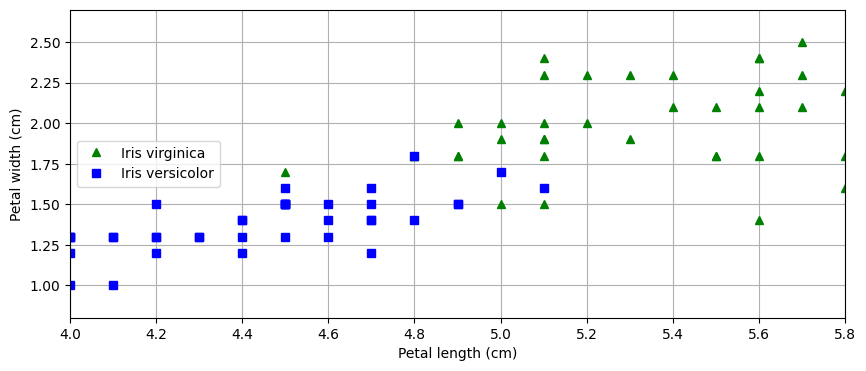

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(X[y == 1, 0], X[y == 1, 1], "g^", label="Iris virginica")
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", label="Iris versicolor")

plt.axis([4.0, 5.8, 0.8, 2.7])
plt.legend(loc="center left")
plt.grid()
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.show()

In [4]:
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new)

array([ True, False])

In [5]:
svm_clf.decision_function(X_new)

array([ 0.66163411, -0.22036063])

# Nonlinear SVM Classification

In [16]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10_000, random_state=42),
)
polynomial_svm_clf.fit(X, y)

/home/julio/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

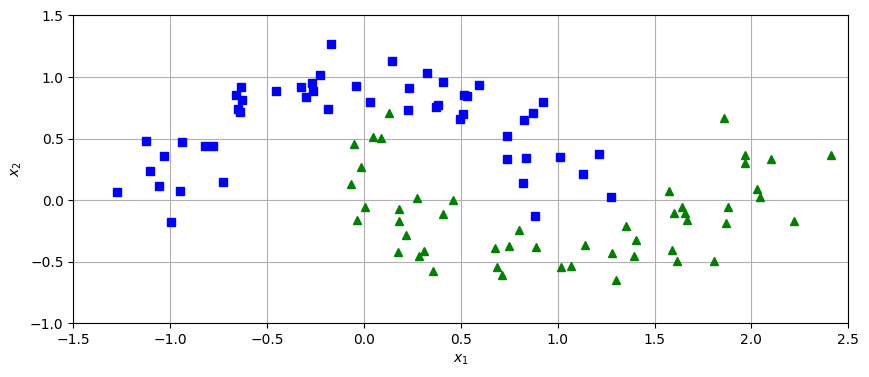

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(X[y == 1, 0], X[y == 1, 1], "g^")
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs")

axis = [-1.5, 2.5, -1.0, 1.5]
plt.axis(axis)
plt.grid()
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

## Polynomial Kernel

In [18]:
from sklearn.svm import SVC

poly_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=3, coef0=1, C=5),
)
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

## Gaussian RBF Kernel

In [22]:
rbf_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="rbf", gamma=5, C=0.001),
)
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

# SVM Regression

## Linear

In [27]:
from sklearn.svm import LinearSVR
import numpy as np

np.random.seed(42)
m = 100 # number of instances
X = 2 * np.random.rand(m, 1) # column vector
y = 4 + 3 * X + np.random.randn(m, 1) # column vector
y = y.ravel()

svm_reg = make_pipeline(
    StandardScaler(),
    LinearSVR(epsilon=0.5, random_state=42),
)
svm_reg.fit(X, y)

/home/julio/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(epsilon=0.5, random_state=42))])

In [ ]:
# TODO: plot the previous data
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 4))
# plt.plot(X[y == 1, 0], X[y == 1, 1], "g^", label="Iris virginica")
# plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", label="Iris versicolor")

# plt.axis([4.0, 5.8, 0.8, 2.7])
# plt.legend(loc="center left")
# plt.grid()
# plt.xlabel("Petal length (cm)")
# plt.ylabel("Petal width (cm)")
# plt.show()

## Nonlinear

In [30]:
from sklearn.svm import SVR

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = (0.5 * (X ** 2)) + X + 2 + np.random.randn(m, 1)
y = y.ravel()

svm_poly_reg = make_pipeline(
    StandardScaler(),
    SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1),
)
svm_poly_reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=0.01, degree=2, kernel='poly'))])

In [31]:
# TODO: plot the previous data
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 4))
# plt.plot(X[y == 1, 0], X[y == 1, 1], "g^", label="Iris virginica")
# plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", label="Iris versicolor")

# plt.axis([4.0, 5.8, 0.8, 2.7])
# plt.legend(loc="center left")
# plt.grid()
# plt.xlabel("Petal length (cm)")
# plt.ylabel("Petal width (cm)")
# plt.show()